In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
train = pd.read_csv('train_in.csv')
test = pd.read_csv('test_in.csv')

In [3]:
print(train.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [4]:
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
X = train[features]
y = train['SalePrice']

In [5]:
X = X.fillna(X.mean())

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)

In [10]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [11]:
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Absolute Error: 35788.06129243631
R-squared: 0.6341189942328374


Text(0, 0.5, 'Frequency')

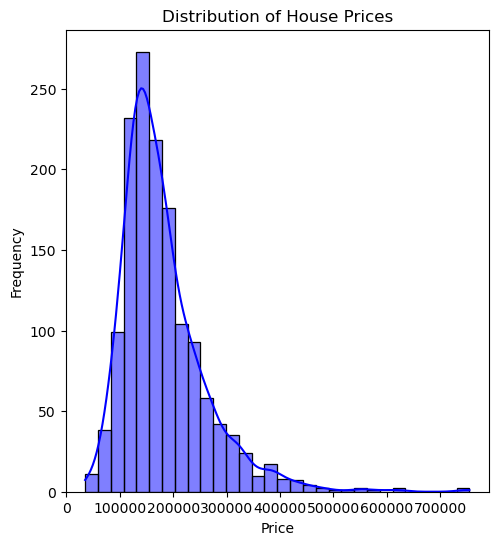

In [12]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(y, kde=True, bins=30, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

C:\Users\sri siva sruthika.St\AppData\Local\Temp\ipykernel_15420\1084540758.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


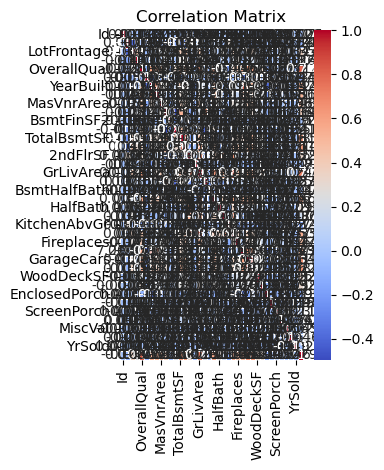

In [13]:
plt.subplot(1, 2, 2)
corr_matrix = train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

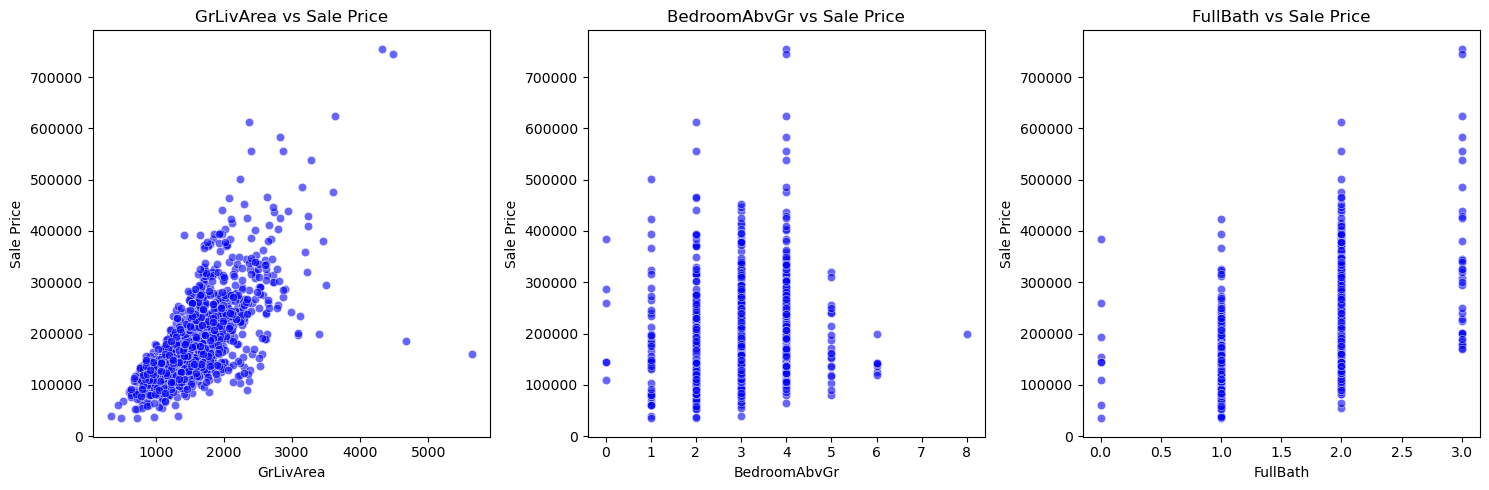

In [14]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=train[feature], y=y, color='blue', alpha=0.6)
    plt.title(f'{feature} vs Sale Price')
    plt.xlabel(feature)
    plt.ylabel('Sale Price')

plt.tight_layout()
plt.show()


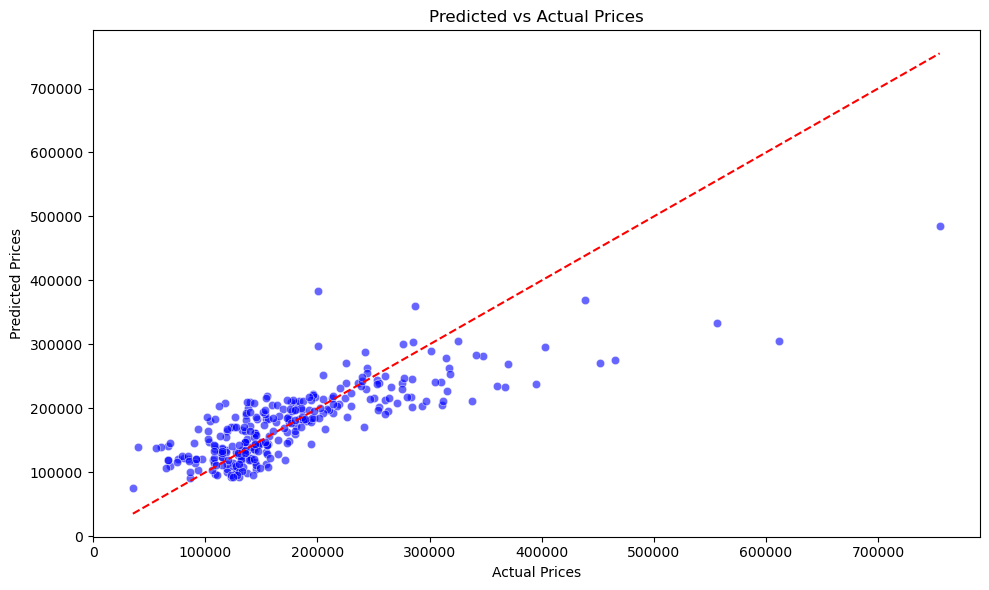

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.tight_layout()
plt.show()

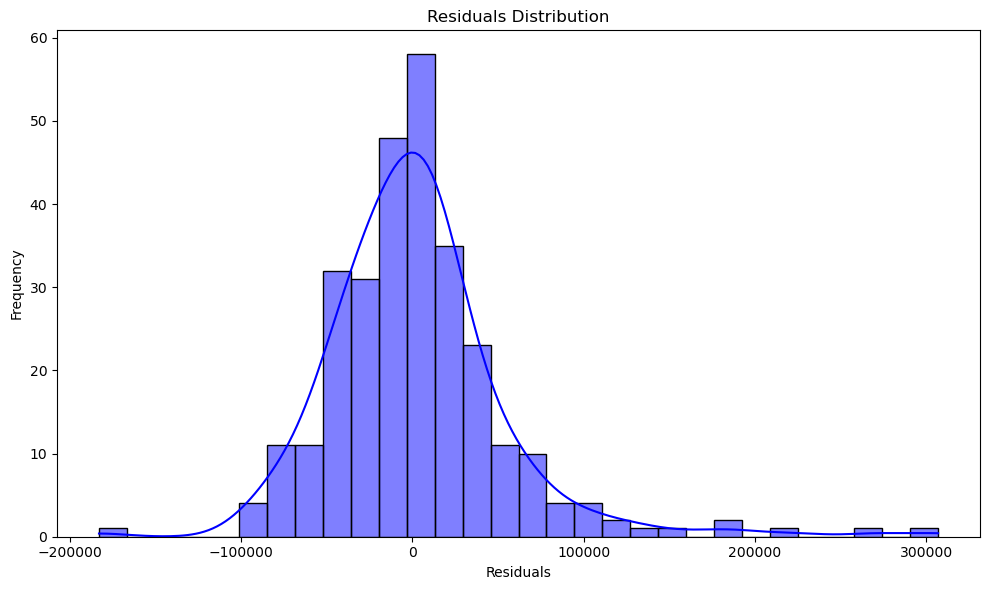

In [16]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [17]:
test_features = test[features]
test_features = test_features.fillna(test_features.mean())
test_predictions = model.predict(test_features)

In [18]:
test['SalePrice'] = test_predictions
test[['Id', 'SalePrice']].to_csv('submission.csv', index=False)

In [19]:
print('\nSample Predictions:')
print(test[['Id', 'SalePrice']].head(10))


Sample Predictions:
     Id      SalePrice
0  1461  122173.313104
1  1462  140561.538683
2  1463  201783.754896
3  1464  199183.097221
4  1465  192133.739106
5  1466  204488.438878
6  1467  155804.127196
7  1468  184723.440546
8  1469  168465.019725
9  1470  120716.944806
